# Conexão com o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação das bibliotecas

In [ ]:
!pip install pandas
!pip install sklearning
!pip install numpy


  Preparing metadata (setup.py) ... done
  Created wheel for sklearning: filename=sklearning-0.0.1-py3-none-any.whl size=3143 sha256=207f9f4f7fedb3238714c865435c405fdde658a8f62fcdd68e8d8be9cdb0a32c
  Stored in directory: /root/.cache/pip/wheels/2b/d0/f5/ee73c19c836bdef55c22cfdce9d9caa0941e4b03ac63f8817a
Successfully built sklearning


# Carregamento do datast

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')
#dataset.head() verifica as 5 primeiras linhas do dataset
dataset.describe() # descrição do dataframe


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## Descrição do dataset:
date: A data em que a casa foi vendida.

price: O preço de venda da casa em dólares americanos.

bedrooms: O número de quartos na casa.

bathrooms: O número de banheiros na casa.

sqft_living: A área do espaço interno da casa em pés quadrados.

sqft_lot: A área total do terreno em pés quadrados.

floors: O número de andares (níveis) da casa.

waterfront: Uma variável que indica se a casa tem ou não vista para o mar/lago (geralmente 0 para não e 1 para sim).

view: Uma classificação numérica da qualidade da vista da propriedade (provavelmente de 0 a 4).

condition: Uma classificação da condição geral da casa (provavelmente de 1 a 5).

sqft_above: A área do espaço interno da casa que está acima do nível do solo, em pés quadrados.

sqft_basement: A área do porão em pés quadrados.

yr_built: O ano em que a casa foi construída.

yr_renovated: O ano em que a casa foi renovada pela última vez. Se for 0, significa que nunca foi renovada.

street: O endereço da rua da propriedade.

city: A cidade onde a propriedade está localizada.

statezip: O estado e o código postal (CEP) da propriedade.

country: O país onde a propriedade está localizada.

# Checagem geral

Verificar informações sobre os tipos de dados e a contagem.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Verificar se tem dados nulos

In [ ]:
null_values = dataset.isnull().sum()
print(null_values)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Verificar se tem colunas vazias

In [ ]:
unique_values = dataset.nunique()
print(unique_values)

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64


Obs: Vamos excluir a coluna country pois todas as casas estão no mesmo país.

In [ ]:
dataset.drop(columns=['country'], inplace=True)

# Visualização dos dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## Análise de distribuição

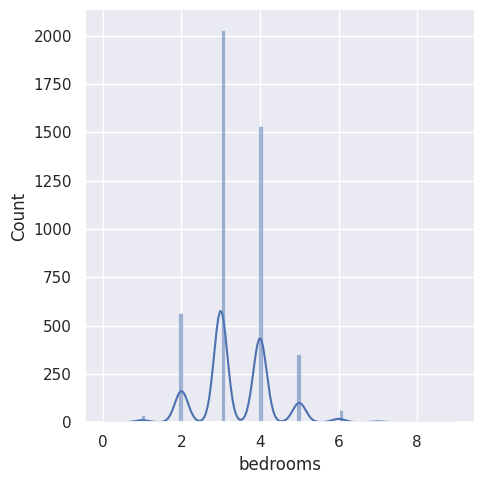

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(data= dataset['bedrooms'], kde=True)

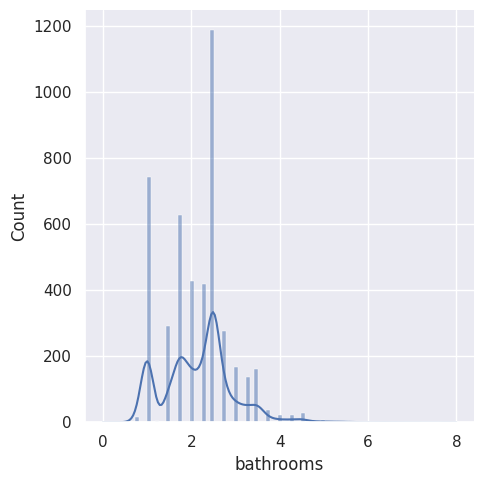

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(data= dataset['bathrooms'], kde=True)

<Axes: xlabel='city'>

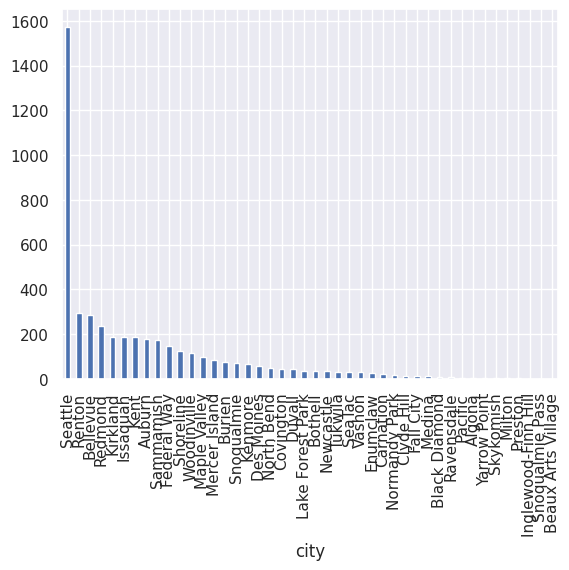

In [ ]:
dataset['city'].value_counts().plot(kind='bar')

<Axes: xlabel='view'>

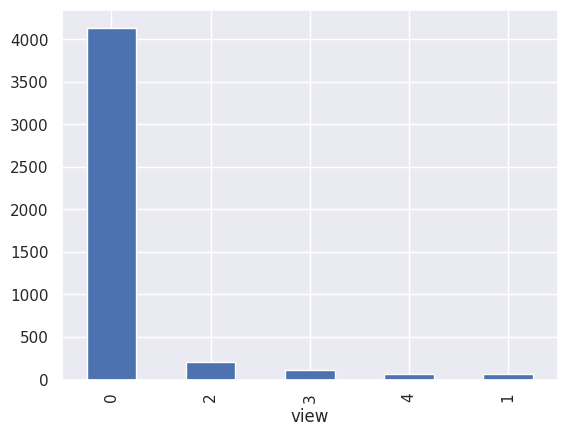

In [ ]:
dataset['view'].value_counts().plot(kind='bar')

<Axes: xlabel='condition'>

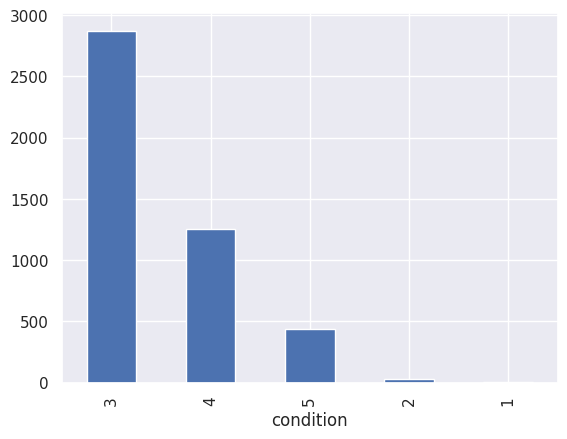

In [ ]:
dataset['condition'].value_counts().plot(kind='bar')

<Axes: xlabel='waterfront'>

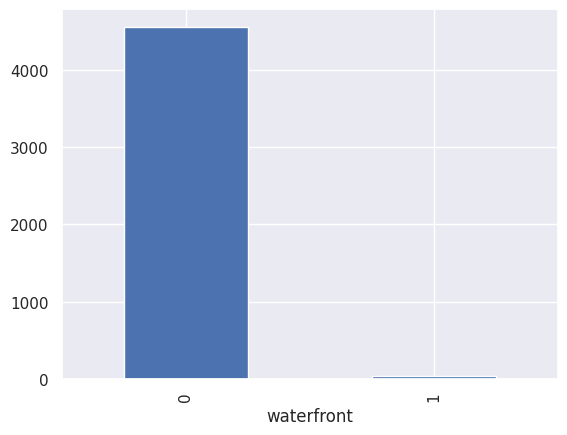

In [ ]:
dataset['waterfront'].value_counts().plot(kind='bar')

# Aplicar OneHotEncoder em variáveis categóricas

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Carregar o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')

# Selecionar a coluna 'city' para a codificação
# É importante manter o formato de DataFrame com colchetes duplos [[]]
city_column = df[['city']]

# Criar uma instância (um objeto) do OneHotEncoder.
# sparse_output=False é usado para que o resultado seja uma matriz normal,
# o que é mais fácil de visualizar. O padrão é retornar uma matriz esparsa.
onehot_encoder = OneHotEncoder(sparse_output=False)

# Treinar o encoder e transformar a coluna 'city'
city_encoded = onehot_encoder.fit_transform(city_column)

# Opcional: Mostrar o resultado
# Mostra o formato da nova matriz (número de linhas, número de novas colunas)
print(f"Formato da matriz resultante: {city_encoded.shape}")

# Mostra as 5 primeiras linhas do resultado
print("\nCinco primeiras linhas da matriz codificada:")
print(city_encoded[:5])

# Opcional: Ver os nomes das novas colunas criadas
print("\nNomes das novas colunas:")
print(onehot_encoder.get_feature_names_out(['city']))

Formato da matriz resultante: (4600, 44)

Cinco primeiras linhas da matriz codificada:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Nomes das novas colunas:
['city_Algona' 'city_Auburn' 'city_Beaux Arts Village' 'city_Bellevue'
 'city_Black Diamond' 'city_Bothell' 'city_Burien' 'city_Carnation'
 'city_Clyde Hill' 'city_Covington' 'city_Des Moines' 'city_Du

# Treinamento de uma regressão linear

### Importação das bibliotecas

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

### Preparação dos dados e identificação de colunas

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')
dataset.drop(columns=['country', 'date', 'street', 'statezip'], inplace=True)
df_limpo = dataset[dataset['price'] > 0]
X = df_limpo.drop(columns=['price'])
y = df_limpo ['price']
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['city']
if 'city' in numeric_features:
  numeric_features.remove('city')

### Criar o pepiline de pré-processamento e o modelo

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
model = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

### Configurar e executar a validação cruzada

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')


### Visualizar resultados:

In [ ]:
print("Resultados da Avaliação com Validação Cruzada (5-Folds)")
print("="*60)
print(f"Scores de R² para cada fold: {np.round(r2_scores, 4)}")
print(f"Média do R²: {r2_scores.mean():.4f}")
print(f"Desvio Padrão do R²: {r2_scores.std():.4f}")
print("-" * 60)
print(f"Scores de MAE para cada fold: {[f'${score:,.2f}' for score in mae_scores]}")
print(f"Média do MAE: ${mae_scores.mean():,.2f}")
print(f"Desvio Padrão do MAE: ${mae_scores.std():,.2f}")

Resultados da Avaliação com Validação Cruzada (5-Folds)
Scores de R² para cada fold: [0.678  0.0529 0.3215 0.6147 0.6927]
Média do R²: 0.4720
Desvio Padrão do R²: 0.2489
------------------------------------------------------------
Scores de MAE para cada fold: ['$-131,458.15', '$-150,088.94', '$-135,861.85', '$-129,578.94', '$-124,165.74']
Média do MAE: $-134,230.72
Desvio Padrão do MAE: $8,772.39


### Descrição:

A média do R² de 0.5064. Isso mostra que o modelo, na verdade, consegue explicar cerca de 50% da variação dos preços. Obs: o R² pode ser enganoso, pois seu valor sempre aumenta quando adicionamos novas features, mesmo que elas não sejam úteis. Por isso, em projetos mais avançados, preferimos o R² Ajustado, que penaliza o modelo pela inclusão de preditores não significativos.

Um MAE de $134,230.72 é a métrica mais fácil de comunicar para um stakeholder ou cliente. Ela significa que, para uma casa qualquer, nossa previsão tende a errar, para menos, em cerca de 135 mil dólares. A principal característica do MAE é que ele trata todos os erros com o mesmo peso. Errar em 200k tem o dobro do peso de errar em 100k. Por ser menos sensível a outliers (previsões absurdamente erradas), ele nos dá uma visão geral do erro "típico" do modelo.

Dica:  Quanto maior a diferença entre o RMSE e o MAE, maior a variância nos erros, o que geralmente indica que o modelo está fazendo algumas previsões muito, muito ruins para um subconjunto de imóveis (os outliers).



# Treinamento de um random forest regressor

### Importação das bibliotecas

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

### Preparação dos dados e identificação das colunas

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')
dataset.drop(columns=['country', 'date', 'street', 'statezip'], inplace=True)
X = dataset.drop(columns=['price'])
y = dataset['price']
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['city']
if 'city' in numeric_features:
  numeric_features.remove('city')

### Criar o pepiline de pré-processamento e o modelo

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
model = RandomForestRegressor(n_jobs=-1, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

### Configurar e executar a validação cruzada

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')


### Visualizar resultados:

In [ ]:
print("Resultados da Avaliação com Validação Cruzada (5-Folds)")
print("="*60)
print(f"Scores de R² para cada fold: {np.round(r2_scores, 4)}")
print(f"Média do R²: {r2_scores.mean():.4f}")
print(f"Desvio Padrão do R²: {r2_scores.std():.4f}")
print("-" * 60)
print(f"Scores de MAE para cada fold: {[f'${score:,.2f}' for score in mae_scores]}")
print(f"Média do MAE: ${mae_scores.mean():,.2f}")
print(f"Desvio Padrão do MAE: ${mae_scores.std():,.2f}")

Resultados da Avaliação com Validação Cruzada (5-Folds)
Scores de R² para cada fold: [ 0.0439 -0.0838  0.4944  0.5899 -0.0254]
Média do R²: 0.2038
Desvio Padrão do R²: 0.2808
------------------------------------------------------------
Scores de MAE para cada fold: ['$-168,318.40', '$-142,669.19', '$-134,687.03', '$-121,868.03', '$-136,769.72']
Média do MAE: $-140,862.47
Desvio Padrão do MAE: $15,315.14


### Analise:
Estes resultados são extremamente inesperados e são um grande sinal de alerta. O fato de o RandomForest ter tido uma performance drasticamente pior que a Regressão Linear (R² médio de 20% vs 50%) e apresentar scores de R² negativos vai contra toda a intuição teórica. Um R² negativo significa que o modelo é pior do que simplesmente prever o preço médio para todas as casas.

Isso nos diz duas coisas:

O problema não está na escolha do modelo (RandomForest é um modelo poderoso).

O problema quase certamente está nos dados que estamos fornecendo ao modelo.

Minha Hipótese: Valores Inválidos na Coluna price
A causa mais provável para este comportamento são dados inválidos na nossa variável alvo (price). Especificamente, suspeito que existam casas registradas com preço igual a zero.

Modelos de regressão tentam minimizar o erro. Se o modelo é forçado a aprender com exemplos onde o preço é 0.0, isso pode distorcer completamente sua capacidade de generalização, levando a previsões péssimas e, consequentemente, a um R² negativo em alguns folds da validação cruzada.

Ação: Vamos Investigar os Dados
Para confirmar (ou refutar) essa hipótese, precisamos inspecionar a coluna price. Vou gerar um código simples para contar quantas casas no dataset têm preço igual a zero ou um valor muito baixo.



In [ ]:
casas_preco_zero = (dataset[dataset['price'] == 0])
print(casas_preco_zero.count())

price            49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       49
view             49
condition        49
sqft_above       49
sqft_basement    49
yr_built         49
yr_renovated     49
city             49
dtype: int64


Como suspeitávamos, a investigação revelou o problema:

Existem 49 casas no seu conjunto de dados com o preço registrado como 0.0.

Isso é um erro clássico de entrada de dados, onde um valor ausente foi preenchido com zero. Treinar qualquer modelo com esses dados "corrompidos" leva aos resultados estranhos e ruins que você observou. Nenhum modelo consegue aprender a precificar imóveis se parte dos exemplos diz que eles não têm valor.

Este é um exemplo perfeito do princípio mais importante em machine learning: "Garbage In, Garbage Out" (Lixo entra, Lixo sai). A qualidade dos seus dados é mais importante do que a complexidade do seu modelo.

A Solução: Limpar os Dados e Retreinar o Modelo
A solução agora é simples e direta: vamos remover essas 49 linhas problemáticas e treinar o RandomForest novamente, mas desta vez apenas com os dados válidos.



### Dataset limpo e re-treinado

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')

# 2. LIMPEZA DOS DADOS: O passo crucial
# Removemos todas as linhas onde o preço era igual a zero.
original_rows = len(df)
df_limpo = df[df['price'] > 0]
cleaned_rows = len(df_limpo)

print(f"Limpeza de dados: {original_rows - cleaned_rows} linhas com preço zero foram removidas.")
print("-" * 70)
df_limpo.drop(columns=['country', 'date', 'street', 'statezip'], inplace=True)
# 3. Preparação dos Dados (usando o dataframe limpo: 'df_limpo')
X = df_limpo.drop('price', axis=1)
y = df_limpo['price']

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['city']
if 'city' in numeric_features:
    numeric_features.remove('city')

# 4. Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 5. Definir o modelo RandomForestRegressor
# n_jobs=-1 usa todos os processadores para acelerar o treino
# random_state=42 garante que o resultado seja sempre o mesmo ao rodar o código
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Criar o pipeline final que une pré-processamento e o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# 6. Configurar e Executar a Validação Cruzada nos dados limpos
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
mae_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')

# 7. Apresentar os resultados finais
print("Resultados do RandomForest APÓS A LIMPEZA com Validação Cruzada")
print("="*70)
print(f"Scores de R² para cada fold: {np.round(r2_scores, 4)}")
print(f"Média do R²: {r2_scores.mean():.4f}")
print(f"Desvio Padrão do R²: {r2_scores.std():.4f}")
print("-" * 70)
print(f"Scores de MAE para cada fold: {[f'${score:,.2f}' for score in mae_scores]}")
print(f"Média do MAE: ${mae_scores.mean():,.2f}")
print(f"Desvio Padrão do MAE: ${mae_scores.std():,.2f}")

Limpeza de dados: 49 linhas com preço zero foram removidas.
----------------------------------------------------------------------


/tmp/ipython-input-3834027918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo.drop(columns=['country', 'date', 'street', 'statezip'], inplace=True)


Resultados do RandomForest APÓS A LIMPEZA com Validação Cruzada
Scores de R² para cada fold: [0.5143 0.0501 0.2912 0.6409 0.3017]
Média do R²: 0.3597
Desvio Padrão do R²: 0.2034
----------------------------------------------------------------------
Scores de MAE para cada fold: ['$124,958.77', '$143,762.26', '$130,394.97', '$114,908.79', '$130,336.09']
Média do MAE: $128,872.18
Desvio Padrão do MAE: $9,343.10


# Comparação entre os modelos:

O random forest se mostrou muito mais eficaz em mostrar variações dos preços melhor do que o modelo de regressão linar, apesar de ter um R² um pouco maior, ou seja, conseguir responder melhor sobre os dados, ainda assim, essa métrica pode ser enganosa, pois o modelo é sensível a outliers.
Próxima etapa, melhorar os hiperparâmetros do Random Forest e torná-lo um modelo ainda mais poderoso e eficiente.

# Gradient Boosting com XGBoost


### Importação das bibliotecas:

In [ ]:
!pip install xgboost
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import numpy as np
import pandas as pd



### Preparação dos dados e identificação das colunas

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')
dataset.drop(columns=['country', 'date', 'street', 'statezip'], inplace=True)
X = dataset.drop(columns=['price'])
y = dataset['price']
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['city']
if 'city' in numeric_features:
  numeric_features.remove('city')

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
model = xgb.XGBRegressor(n_jobs=1, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])

### Criar o pepiline de pré-processamento e o modelo

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
mae_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')

### Apresentação dos resultados

In [ ]:
print("Resultados do XGBoost com Validação Cruzada (Dados Limpos)")
print("="*70)
print(f"Média do R²: {r2_scores.mean():.4f}")
print(f"Média do MAE: ${mae_scores.mean():,.2f}")

Resultados do XGBoost com Validação Cruzada (Dados Limpos)
Média do R²: -0.4732
Média do MAE: $147,795.74


### Identificação da causa dos resultados

Gerando gráfico 'price_distribution.png' para visualização...
Gráfico salvo!
----------------------------------------------------------------------
Resultados do XGBoost APÓS TRANSFORMAÇÃO LOG no Preço
Média do R²: 0.6791
Média do MAE (em escala logarítmica): 0.2008

(Nota: O MAE está em 'log-dólares'. O sucesso do modelo é medido principalmente pelo R²)


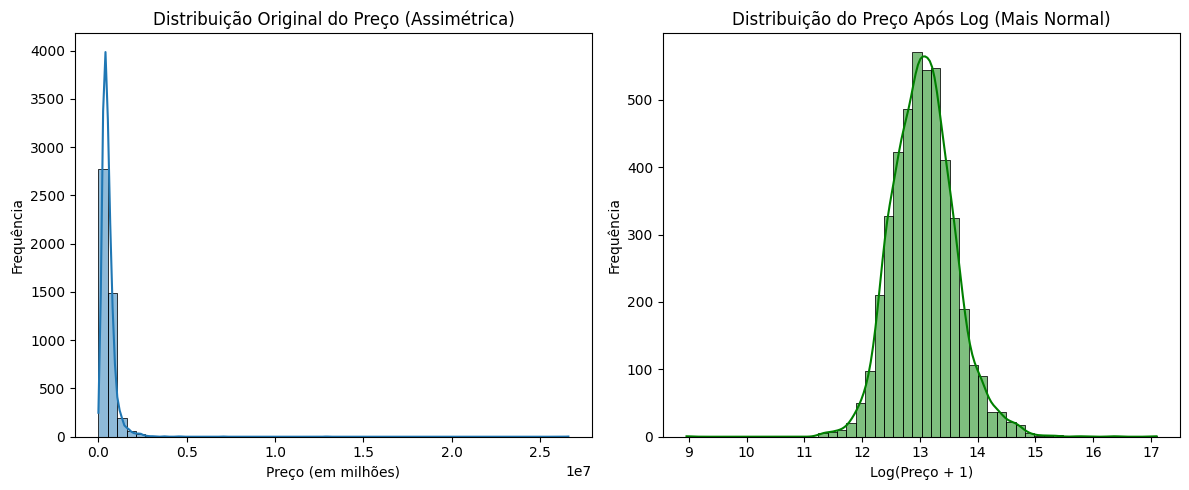

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- INÍCIO DA ANÁLISE ---

# 1. Carregar e limpar os dados
df = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')
df_limpo = df[df['price'] > 0]
y_original = df_limpo['price']

# 2. Visualizar a distribuição do preço (ANTES E DEPOIS)
print("Gerando gráfico 'price_distribution.png' para visualização...")
plt.figure(figsize=(12, 5))

# Gráfico 1: Distribuição Original
plt.subplot(1, 2, 1)
sns.histplot(y_original, kde=True, bins=50)
plt.title('Distribuição Original do Preço (Assimétrica)')
plt.xlabel('Preço (em milhões)')
plt.ylabel('Frequência')

# Gráfico 2: Distribuição Log-Transformada
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(y_original), kde=True, bins=50, color='green')
plt.title('Distribuição do Preço Após Log (Mais Normal)')
plt.xlabel('Log(Preço + 1)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('price_distribution.png')
print("Gráfico salvo!")
print("-" * 70)

# --- INÍCIO DO RETREINAMENTO ---

# 3. Preparação dos Dados com Transformação Logarítmica na variável alvo
X = df_limpo.drop('price', axis=1)
y_log = np.log1p(df_limpo['price']) # APLICA A TRANSFORMAÇÃO LOG

# 4. Pipeline de Pré-processamento (idêntico)
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['city']
if 'city' in numeric_features:
    numeric_features.remove('city')

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 5. Modelo XGBoost (idêntico)
model = XGBRegressor(n_jobs=-1, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# 6. Validação Cruzada (agora com y_log)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y_log, cv=cv, scoring='r2')
mae_scores_log = -cross_val_score(pipeline, X, y_log, cv=cv, scoring='neg_mean_absolute_error')

# 7. Apresentar os resultados
print("Resultados do XGBoost APÓS TRANSFORMAÇÃO LOG no Preço")
print("="*70)
print(f"Média do R²: {r2_scores.mean():.4f}")
print(f"Média do MAE (em escala logarítmica): {mae_scores_log.mean():.4f}")
print("\n(Nota: O MAE está em 'log-dólares'. O sucesso do modelo é medido principalmente pelo R²)")


# Optuna

### Instalação

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 26.0 MB/s eta 0:00:00


### Importações dos dados e das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import optuna


### 1. Definir a função objetivo:

In [ ]:
def objective(trial):
  # Definir os dados em conjunto de treino e validação.
  X_train, X_val, y_train_log, y_val_log = train_test_split(X, y_log, test_size=0.25, random_state=42)
  # Definir o espaço de busca de hiperparâmetros.
  param = {
        'objective': 'reg:squarederror', # Objetivo para regressão
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True), # L2 Regularization
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),   # L1 Regularization
        'random_state': 42
  }
  # Criar o modelo XGBoost com os parâmetros sugeridos:
  model = xgb.XGBRegressor(**param)
  # Criar um pepiline final que inclui o pré-processamento e o modelo.
  pipeline_final = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
  # Treinar o modelo:
  pipeline_final.fit(X_train, y_train_log)

  # Fazer previsões no conjunto de validação:

  preds_log = pipeline_final.predict(X_val)

  # Inversa da transformação logarítmica:

  preds_original_scale = np.expm1(preds_log)
  y_val_original_scale = np.expm1(y_val_log)

  # Calcular o RMSE que o Optuna deve minimizar:
  rmse = np.sqrt(mean_squared_error(y_val_original_scale, preds_original_scale))
  return rmse



### 2. Criar e executar o estudo:

In [ ]:
#Queremos minimizar o erro (RMSE), então a direção é minimize.
study = optuna.create_study(direction='minimize')
#Executa 50 tentativas para melhorar os parâmetros
study.optimize(objective, n_trials=50)

[I 2025-09-02 03:06:35,627] A new study created in memory with name: no-name-9e63dc32-9903-4f99-b726-c332a29b09d7
[I 2025-09-02 03:06:36,945] Trial 0 finished with value: 229122.70440465934 and parameters: {'n_estimators': 1608, 'learning_rate': 0.14178790608201172, 'max_depth': 9, 'subsample': 0.8455094106510467, 'colsample_bytree': 0.6148211890755614, 'gamma': 3.635694382793988e-05, 'min_child_weight': 1, 'lambda': 0.0054005429492023915, 'alpha': 3.154724377018233e-05}. Best is trial 0 with value: 229122.70440465934.
[I 2025-09-02 03:06:37,196] Trial 1 finished with value: 217032.43223175153 and parameters: {'n_estimators': 472, 'learning_rate': 0.078847117350326, 'max_depth': 10, 'subsample': 0.724538271769536, 'colsample_bytree': 0.7666624626143872, 'gamma': 0.1867881804120665, 'min_child_weight': 6, 'lambda': 0.06770619985270712, 'alpha': 2.7049639882424278e-06}. Best is trial 1 with value: 217032.43223175153.
[I 2025-09-02 03:06:40,423] Trial 2 finished with value: 201174.6613732

### 3. Exibir os resultados

In [ ]:
print("\nOtimização concluída.")
print(f"Melhor RMSE: {study.best_value:.4f}")
print("Melhores Parâmetros encontrados:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")


Otimização concluída.
Melhor RMSE: 190290.8811
Melhores Parâmetros encontrados:
  n_estimators: 1789
  learning_rate: 0.016144774295561038
  max_depth: 4
  subsample: 0.9092847375795229
  colsample_bytree: 0.6011153935566211
  gamma: 0.013776329553685593
  min_child_weight: 4
  lambda: 0.0011444731931836729
  alpha: 2.1838490527335656e-05


### 4. Treinar o modelo final com os melhores parâmetros

In [ ]:
# Agora você pode usar study.best_params para treinar seu modelo final
# usando TODOS os dados (X e y_log) para produção.
final_params = study.best_params
final_model_xgb = xgb.XGBRegressor(**final_params, random_state=42)
pipeline_final_prod = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', final_model_xgb)])
pipeline_final_prod.fit(X, y_log)
print("\nModelo final treinado com os melhores parâmetros!")


Modelo final treinado com os melhores parâmetros!


### Salvando o modelo otmizado

In [ ]:
import joblib

# Salvar o pipeline completo
joblib.dump(pipeline_final_prod, 'modelo_previsao_preco_v1.pkl')

# Para carregar no futuro:
# loaded_model = joblib.load('modelo_previsao_preco_v1.pkl')
# predictions = loaded_model.predict(novos_dados)

['modelo_previsao_preco_v1.pkl']

## Teste de confiabilidade:

In [ ]:
# ===================================================================
# PASSO 1: IMPORTAR TODAS AS BIBLIOTECAS NECESSÁRIAS
# ===================================================================
import pandas as pd
import numpy as np
import random
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

print("Bibliotecas importadas com sucesso!")

# ===================================================================
# PASSO 2: FUNÇÃO PARA GERAR O DATASET SINTÉTICO
# ===================================================================
def criar_dataset_aleatorio(num_amostras=5000):
    """
    Cria um DataFrame de pandas com dados sintéticos para um problema de previsão de preços de imóveis.
    """
    print(f"Gerando {num_amostras} amostras de dados aleatórios...")

    # Definir as features categóricas
    cidades = ['São Paulo', 'Recife', 'Belo Horizonte', 'Porto Alegre', 'Salvador']
    lista_cidades = [random.choice(cidades) for _ in range(num_amostras)]

    # Mapear cidades a um multiplicador de preço para criar uma lógica
    multiplicador_cidade = {
        'São Paulo': 1.8,
        'Recife': 1.1,
        'Belo Horizonte': 1.3,
        'Porto Alegre': 1.2,
        'Salvador': 1.0
    }
    multiplicadores = [multiplicador_cidade[cidade] for cidade in lista_cidades]

    # Definir as features numéricas
    area_m2 = np.random.normal(loc=120, scale=40, size=num_amostras).astype(int)
    quartos = np.random.randint(1, 6, size=num_amostras)
    banheiros = np.random.randint(1, 5, size=num_amostras)
    vagas_garagem = np.random.randint(0, 4, size=num_amostras)
    idade_imovel = np.random.randint(0, 50, size=num_amostras)

    area_m2 = np.abs(area_m2) # Garantir que valores sejam positivos

    # Criar a variável alvo (price) com uma lógica e ruído
    preco_base = (area_m2 * 2500) + (quartos * 15000) + (banheiros * 10000) - (idade_imovel * 500)
    preco_com_logica = preco_base * multiplicadores
    ruido = np.random.normal(loc=0, scale=50000, size=num_amostras)
    preco_final = np.abs((preco_com_logica + ruido).astype(int))

    # Montar o DataFrame
    df_aleatorio = pd.DataFrame({
        'area_m2': area_m2,
        'quartos': quartos,
        'banheiros': banheiros,
        'vagas_garagem': vagas_garagem,
        'idade_imovel': idade_imovel,
        'city': lista_cidades,
        'price': preco_final
    })

    print("Dataset criado com sucesso!")
    return df_aleatorio

# ===================================================================
# PASSO 3: GERAR E PREPARAR OS DADOS
# ===================================================================
# Gerar o dataset
df = criar_dataset_aleatorio(num_amostras=5000)
df_limpo = df[df['price'] > 0].copy()

# Separar features (X) e alvo (y)
X = df_limpo.drop('price', axis=1)
y = df_limpo['price']

# Aplicar a transformação logarítmica no alvo para normalizar a distribuição
y_log = np.log1p(y)

# ===================================================================
# PASSO 4: DEFINIR O PIPELINE DE PRÉ-PROCESSAMENTO
# ===================================================================
# Identificar colunas numéricas e categóricas automaticamente
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Criar os transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\nPipeline de pré-processamento definido.")

# ===================================================================
# PASSO 5: DEFINIR A FUNÇÃO OBJETIVO DO OPTUNA
# ===================================================================
def objective(trial):
    # Dividir os dados em treino e validação para este trial específico
    X_train, X_val, y_train_log, y_val_log = train_test_split(X, y_log, test_size=0.25, random_state=42)

    # Definir o espaço de busca dos hiperparâmetros para o XGBoost
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True), # L2 Regularization
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),   # L1 Regularization
        'random_state': 42
    }

    # Criar o modelo com os parâmetros sugeridos
    model = xgb.XGBRegressor(**param)

    # Criar o pipeline final que junta o pré-processador e o modelo
    pipeline_final = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])

    # Treinar o pipeline completo
    pipeline_final.fit(X_train, y_train_log)

    # Fazer previsões no conjunto de validação
    preds_log = pipeline_final.predict(X_val)

    # Reverter a transformação logarítmica para calcular o erro na escala original
    preds_original_scale = np.expm1(preds_log)
    y_val_original_scale = np.expm1(y_val_log)

    # Calcular o RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_val_original_scale, preds_original_scale))

    return rmse

# ===================================================================
# PASSO 6: CRIAR E EXECUTAR O ESTUDO DE OTIMIZAÇÃO
# ===================================================================
# Queremos minimizar o erro (RMSE)
study = optuna.create_study(direction='minimize')

print("\nIniciando a otimização de hiperparâmetros com Optuna...")
# Executa a otimização. Aumente n_trials para uma busca mais completa (ex: 100).
study.optimize(objective, n_trials=50)

# ===================================================================
# PASSO 7: EXIBIR OS RESULTADOS DA OTIMIZAÇÃO
# ===================================================================
print("\nOtimização concluída.")
print(f"Melhor RMSE encontrado: {study.best_value:.4f}")
print("Melhores Parâmetros encontrados:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# ===================================================================
# PASSO 8: TREINAR O MODELO FINAL COM OS MELHORES PARÂMETROS
# ===================================================================
print("\nTreinando o modelo final com os melhores parâmetros em todos os dados...")

final_params = study.best_params
final_model_xgb = xgb.XGBRegressor(**final_params, random_state=42)

# Criar o pipeline final de produção
pipeline_de_producao = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', final_model_xgb)])

# Treinar com TODOS os dados (X e y_log)
pipeline_de_producao.fit(X, y_log)

print("Modelo final treinado e pronto para ser usado!")

[I 2025-09-02 03:17:59,405] A new study created in memory with name: no-name-ae384641-3648-46d7-b948-7d8d585e3525


Bibliotecas importadas com sucesso!
Gerando 5000 amostras de dados aleatórios...
Dataset criado com sucesso!

Pipeline de pré-processamento definido.

Iniciando a otimização de hiperparâmetros com Optuna...


[I 2025-09-02 03:17:59,786] Trial 0 finished with value: 54525.230930424856 and parameters: {'n_estimators': 1075, 'learning_rate': 0.031056796443157467, 'max_depth': 4, 'subsample': 0.7002327108752167, 'colsample_bytree': 0.724665746150416, 'gamma': 0.0011978906207391873, 'min_child_weight': 3, 'lambda': 3.7785518602228815e-08, 'alpha': 4.4024736084680795e-06}. Best is trial 0 with value: 54525.230930424856.
[I 2025-09-02 03:18:00,833] Trial 1 finished with value: 62886.64990054544 and parameters: {'n_estimators': 1078, 'learning_rate': 0.10725302232675248, 'max_depth': 9, 'subsample': 0.782089781575256, 'colsample_bytree': 0.9827141761227486, 'gamma': 1.4669473146824995e-06, 'min_child_weight': 10, 'lambda': 0.00011265221616705658, 'alpha': 3.7587156981593676e-05}. Best is trial 0 with value: 54525.230930424856.
[I 2025-09-02 03:18:00,932] Trial 2 finished with value: 53311.706913297174 and parameters: {'n_estimators': 211, 'learning_rate': 0.0384765308915068, 'max_depth': 4, 'subsam


Otimização concluída.
Melhor RMSE encontrado: 53174.9528
Melhores Parâmetros encontrados:
  n_estimators: 288
  learning_rate: 0.040187681607759713
  max_depth: 4
  subsample: 0.9339621633701524
  colsample_bytree: 0.7500702966236665
  gamma: 3.714446792706497e-08
  min_child_weight: 2
  lambda: 4.464798244101034e-05
  alpha: 0.055762357870837595

Treinando o modelo final com os melhores parâmetros em todos os dados...
Modelo final treinado e pronto para ser usado!
